# --------------------------- Retail Analysis with Walmart Data --------------------------


Description:

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.
________________________________________________________________________________________________________________________________
Dataset Description:

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

Store - the store number

Date - the week of sales

Weekly_Sales - sales for the given store

Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

Temperature - Temperature on the day of sale

Fuel_Price - Cost of fuel in the region

CPI – Prevailing consumer price index

Unemployment - Prevailing unemployment rate

________________________________________________________________________________________________________________________________
Holiday Events:

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13
________________________________________________________________________________________________________________________________

Analysis Tasks:

.Which store has maximum sales

.Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard
 deviation

.Which store/s has good quarterly growth rate in Q3’2012

.Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday       season for all stores together

.Provide a monthly and semester view of sales in units and give insights
________________________________________________________________________________________________________________________________
Statistical Model:

-> For Store 1 – Build  prediction models to forecast demand

  *Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in    order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

  *Change dates into days by creating new variable.

-> Select the model which gives best accuracy.


In [1]:
# importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import sklearn
import seaborn as sns
from math import sqrt
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv("Walmart_Store_sales.csv")

In [3]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [5]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
df.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

# Basic Statistics tasks

In [7]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


# 1.Which store has maximum sales

In [8]:
MAX_Sales=df.groupby('Store')['Weekly_Sales'].sum().round().sort_values(ascending=False)
pd.DataFrame(MAX_Sales).head()

,Weekly_Sales
Store,
20,301397792.0
4,299543953.0
14,288999911.0
13,286517704.0
2,275382441.0


Store-20 has maximum sales with 301397792.0

# 2.Which store has maximum standard deviation i.e., the sales vary a lot  Also, find out the coefficient of mean to standard deviation

In [9]:
Store_MAX_std=df.groupby('Store')['Weekly_Sales'].std().round(2).sort_values(ascending=False)
pd.DataFrame(Store_MAX_std).head()

,Weekly_Sales
Store,
14,317569.95
10,302262.06
20,275900.56
4,266201.44
13,265507.00


store-14 has maximum standard deviation with 317,569.95

In [10]:
coef_mean_std = pd.DataFrame(df.groupby('Store')['Weekly_Sales'].std() / df.groupby('Store')['Weekly_Sales'].mean())
coef_mean_std = coef_mean_std.rename(columns={'Weekly_Sales':'Coefficient of mean to standard deviation'})
coef_mean_std*100

,Coefficient of mean to standard deviation
Store,
1,10.029212
2,12.342388
3,11.502141
4,12.708254
5,11.866844
6,13.582286
7,19.730469
8,11.695283
9,12.689547


In [11]:
store14 = df[df.Store == 14].Weekly_Sales
mean_to_stddev = store14.std()/store14.mean()*100
mean_to_stddev

15.713673600948338

Coefficient of mean to standard deviation for Store-14 is 15.713673600948338

# 3.Which store/s has good quarterly growth rate in Q3’2012

In [12]:
df['Date']=pd.to_datetime(df['Date'],format='%d-%m-%Y')
Q32012 = df[((df['Date']) >= pd.to_datetime('01-07-2012',format="%d-%m-%Y")) &
         ((df['Date']) <= pd.to_datetime('30-09-2012',format="%d-%m-%Y"))]
df.info()
print(Q32012['Date'].unique())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB
['2012-07-06T00:00:00.000000000' '2012-07-13T00:00:00.000000000'
 '2012-07-20T00:00:00.000000000' '2012-07-27T00:00:00.000000000'
 '2012-08-03T00:00:00.000000000' '2012-08-10T00:00:00.000000000'
 '2012-08-17T00:00:00.000000000' '2012-08-24T00:00:00.000000000'
 '2012-08-31T00:00:00.000000000' '2012-09-07T00:00:00.000000000

In [13]:
df_growth=Q32012.groupby(['Store'])['Weekly_Sales'].sum()
df_growth

Store
1     20253947.78
2     24303354.86
3      5298005.47
4     27796792.46
5      4163790.99
6     20167312.24
7      8262787.39
8     11748952.70
9      7022149.56
10    23037258.76
11    17516081.44
12    12536324.37
13    26421259.30
14    21187560.65
15     7612081.03
16     7121541.64
17    12459453.05
18    13489765.27
19    18203554.85
20    26891526.98
21     9027599.32
22    12845139.71
23    18641489.15
24    17976377.72
25     9109081.84
26    13675691.91
27    22307711.41
28    16080704.97
29     6671234.14
30     5594701.86
31    17806714.45
32    15396528.95
33     3433620.36
34    12485995.94
35    11322421.12
36     3831691.64
37     6728068.24
38     5605482.38
39    20715116.23
40    12873195.37
41    18093844.01
42     7296759.34
43     8000572.16
44     4411251.16
45     9581268.38
Name: Weekly_Sales, dtype: float64

In [14]:
print ("Store which has maximum Q3 growth of {} in the year of 2012 is store {}."
       .format(df_growth.max(),df_growth.idxmax()))

Store which has maximum Q3 growth of 27796792.46 in the year of 2012 is store 4.


# 4.Some holidays have a negative impact on sales.Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [15]:
Christmas_sales=df.loc[(df["Date"]==pd.to_datetime("31-12-2010",format="%d-%m-%Y")) |
                                    (df["Date"]==pd.to_datetime("30-12-2011",format="%d-%m-%Y")) | 
                                    (df["Date"]==pd.to_datetime("28-12-2012",format="%d-%m-%Y")) | 
                                    (df["Date"]==pd.to_datetime("27-12-2013",format="%d-%m-%Y"))]
Thanksgiving=df.loc[(df["Date"]==pd.to_datetime("26-11-2010",format="%d-%m-%Y")) | 
                                 (df["Date"]==pd.to_datetime("25-11-2011",format="%d-%m-%Y")) | 
                                 (df["Date"]==pd.to_datetime("23-11-2012",format="%d-%m-%Y")) | 
                                 (df["Date"]==pd.to_datetime("29-11-2013",format="%d-%m-%Y"))]
Labour_day=df.loc[(df["Date"]==pd.to_datetime("10-09-2010",format="%d-%m-%Y")) | 
                               (df["Date"]==pd.to_datetime("09-09-2011",format="%d-%m-%Y")) | 
                               (df["Date"]==pd.to_datetime("07-09-2012",format="%d-%m-%Y")) | 
                               (df["Date"]==pd.to_datetime("06-09-2013",format="%d-%m-%Y"))]
Super_Bowl=df.loc[(df["Date"]==pd.to_datetime("12-02-2010",format="%d-%m-%Y")) | 
                               (df["Date"]==pd.to_datetime("11-02-2011",format="%d-%m-%Y")) | 
                               (df["Date"]==pd.to_datetime("10-02-2012",format="%d-%m-%Y")) | 
                               (df["Date"]==pd.to_datetime("08-02-2013",format="%d-%m-%Y"))]


In [16]:
print ("Total sales in christmas holidays is {}" .format(Christmas_sales["Weekly_Sales"].sum()))
print ("Total sales in Thanksgiving holidays is {} ." .format(Thanksgiving["Weekly_Sales"].sum()))
print ("Total sales in Labour day is {} ." .format(Labour_day["Weekly_Sales"].sum()))
print ("Total sales in Super Bowl is {}" .format(Super_Bowl["Weekly_Sales"].sum()))


Total sales in christmas holidays is 86474980.03999999
Total sales in Thanksgiving holidays is 132414608.5 .
Total sales in Labour day is 140727684.68 .
Total sales in Super Bowl is 145682278.34


In [17]:
holiday_sales=df[df['Holiday_Flag']==1]
holiday_sales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,2010-09-10,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742
...,...,...,...,...,...,...,...,...
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625
6386,45,2011-11-25,1170672.94,1,48.71,3.492,188.350400,8.523
6391,45,2011-12-30,869403.63,1,37.79,3.389,189.062016,8.523
6397,45,2012-02-10,803657.12,1,37.00,3.640,189.707605,8.424


In [18]:
non_holiday_sales=df[df['Holiday_Flag']==0]
non_holiday_sales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [19]:
non_holiday_sales_mean=non_holiday_sales.groupby("Date").agg({"Weekly_Sales":'mean'}).reset_index()
non_holiday_sales_mean

,Date,Weekly_Sales
0,2010-02-05,1.105572e+06
1,2010-02-19,1.072822e+06
2,2010-02-26,9.770794e+05
3,2010-03-05,1.041588e+06
4,2010-03-12,1.020564e+06
...,...,...
128,2012-09-28,9.718867e+05
129,2012-10-05,1.057036e+06
130,2012-10-12,1.025078e+06
131,2012-10-19,1.002720e+06


In [20]:
holiday_sales_sum=holiday_sales.groupby('Date').agg({'Weekly_Sales':'sum'}).reset_index()
holiday_sales_sum

,Date,Weekly_Sales
0,2010-02-12,48336677.63
1,2010-09-10,45634397.84
2,2010-11-26,65821003.24
3,2010-12-31,40432519.00
4,2011-02-11,47336192.79
5,2011-09-09,46763227.53
6,2011-11-25,66593605.26
7,2011-12-30,46042461.04
8,2012-02-10,50009407.92
9,2012-09-07,48330059.31


In [21]:
for X in holiday_sales_sum.itertuples():
    for X1 in non_holiday_sales_mean.itertuples():
        if X.Weekly_Sales > X1.Weekly_Sales:
            print("On Date {} , Holiday sales are greater than Non_Holiday_mean_sales and the sales:- {}"
                  .format(X.Date,X.Weekly_Sales))
            break;

On Date 2010-02-12 00:00:00 , Holiday sales are greater than Non_Holiday_mean_sales and the sales:- 48336677.63
On Date 2010-09-10 00:00:00 , Holiday sales are greater than Non_Holiday_mean_sales and the sales:- 45634397.839999996
On Date 2010-11-26 00:00:00 , Holiday sales are greater than Non_Holiday_mean_sales and the sales:- 65821003.24
On Date 2010-12-31 00:00:00 , Holiday sales are greater than Non_Holiday_mean_sales and the sales:- 40432519.0
On Date 2011-02-11 00:00:00 , Holiday sales are greater than Non_Holiday_mean_sales and the sales:- 47336192.79
On Date 2011-09-09 00:00:00 , Holiday sales are greater than Non_Holiday_mean_sales and the sales:- 46763227.53
On Date 2011-11-25 00:00:00 , Holiday sales are greater than Non_Holiday_mean_sales and the sales:- 66593605.26
On Date 2011-12-30 00:00:00 , Holiday sales are greater than Non_Holiday_mean_sales and the sales:- 46042461.04
On Date 2012-02-10 00:00:00 , Holiday sales are greater than Non_Holiday_mean_sales and the sales:

# 5.Provide a monthly and semester view of sales in units and give insights

In [22]:
df["Year"]= pd.DatetimeIndex(df['Date']).year
df["Month"]= pd.DatetimeIndex(df['Date']).month
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month'],
      dtype='object')

In [23]:
sales_2010=df.loc[df["Year"]==2010]
sales_2011=df.loc[df["Year"]==2011]
sales_2012=df.loc[df["Year"]==2012]

Text(0.5, 1.0, 'Monthly view of sales in 2010')

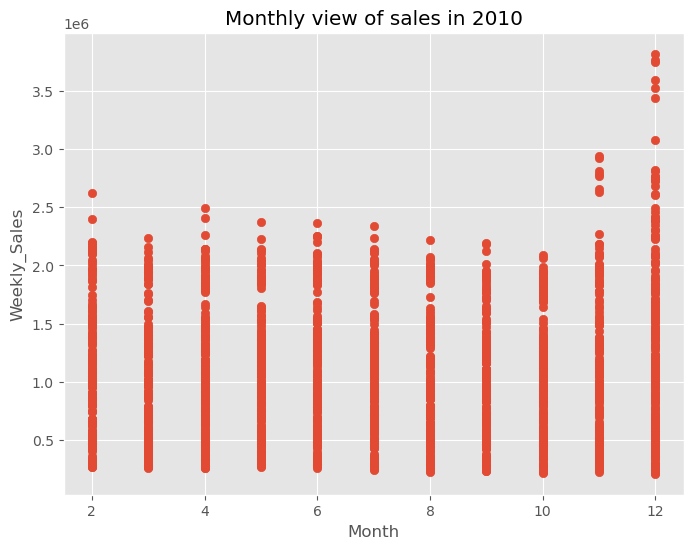

In [24]:
# Monthly view of sales for each year using sactter plot
style.use("ggplot")
plt.figure(figsize=(8,6))
plt.scatter(sales_2010["Month"],sales_2010["Weekly_Sales"])
plt.xlabel("Month")
plt.ylabel("Weekly_Sales")
plt.title("Monthly view of sales in 2010")


Text(0.5, 1.0, 'Monthly view of sales in 2011')

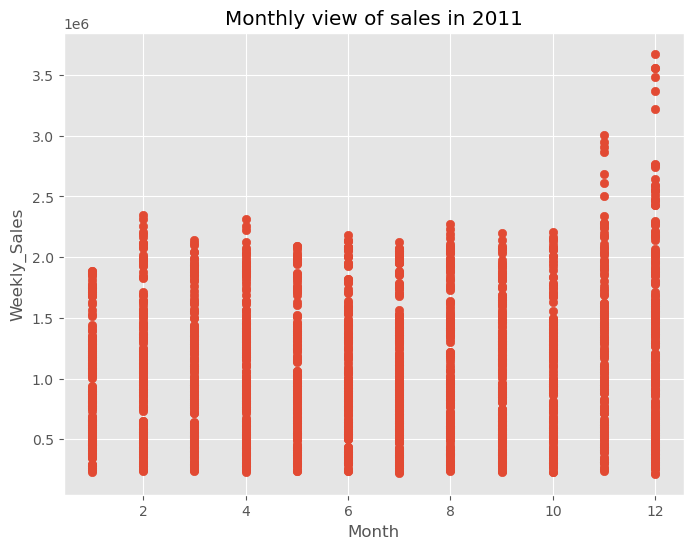

In [25]:
style.use("ggplot")
plt.figure(figsize=(8,6))
plt.scatter(sales_2011["Month"],sales_2011["Weekly_Sales"])
plt.xlabel("Month")
plt.ylabel("Weekly_Sales")
plt.title("Monthly view of sales in 2011")

Text(0.5, 1.0, 'Monthly view of sales in 2012')

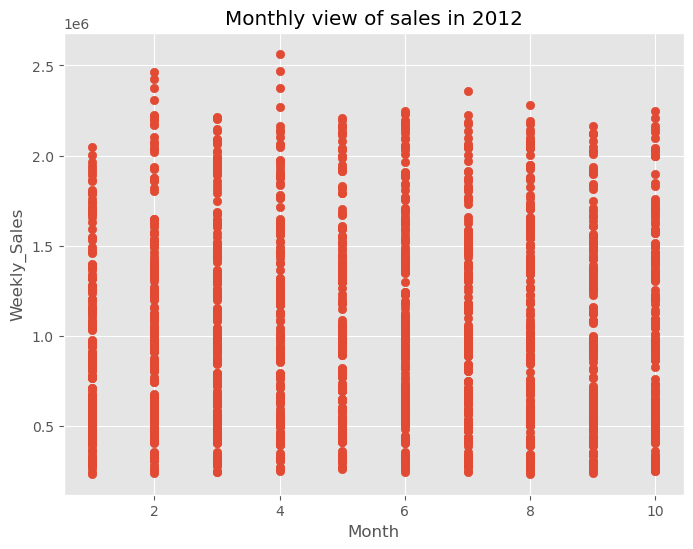

In [26]:
style.use("ggplot")
plt.figure(figsize=(8,6))
plt.scatter(sales_2012["Month"],sales_2012["Weekly_Sales"])
plt.xlabel("Month")
plt.ylabel("Weekly_Sales")
plt.title("Monthly view of sales in 2012")

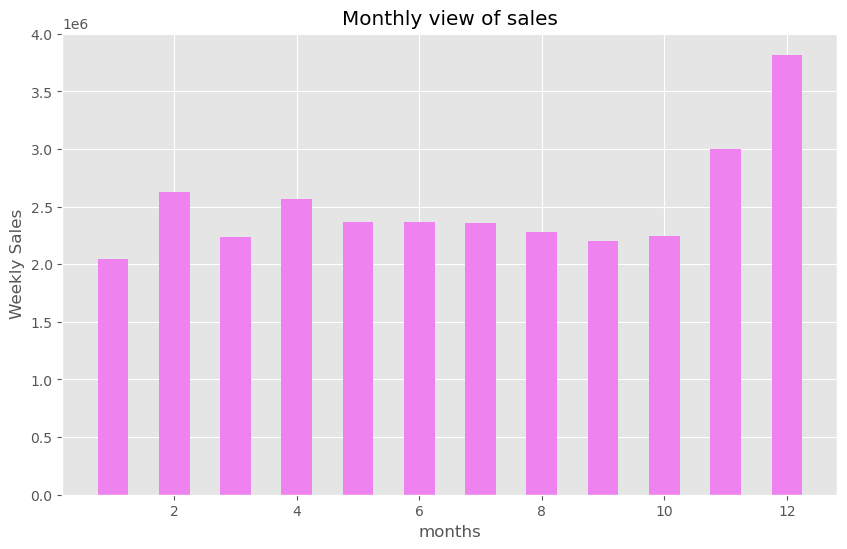

In [27]:
# Complete whole month view of sales
plt.figure(figsize=(10,6))
plt.bar(df["Month"],df["Weekly_Sales"],color ='violet',width = 0.5)
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales")
plt.show()

In [28]:
# Semester view of Sales
semester_sales=[]
semester_sales.append(sales_2010.loc[sales_2010["Month"]<7,["Weekly_Sales"]].sum())
semester_sales.append(sales_2010.loc[sales_2010["Month"]>6,["Weekly_Sales"]].sum())
semester_sales.append(sales_2011.loc[sales_2011["Month"]<7,["Weekly_Sales"]].sum())
semester_sales.append(sales_2011.loc[sales_2011["Month"]>6,["Weekly_Sales"]].sum())
semester_sales.append(sales_2012.loc[sales_2012["Month"]<7,["Weekly_Sales"]].sum())
semester_sales.append(sales_2012.loc[sales_2012["Month"]>6,["Weekly_Sales"]].sum())
semester_names=["sem1_2010","sem2_2010","sem1_2011","sem2_2011","sem1_2012","sem2_2012"]

Text(0.5, 1.0, 'Semester view of sales')

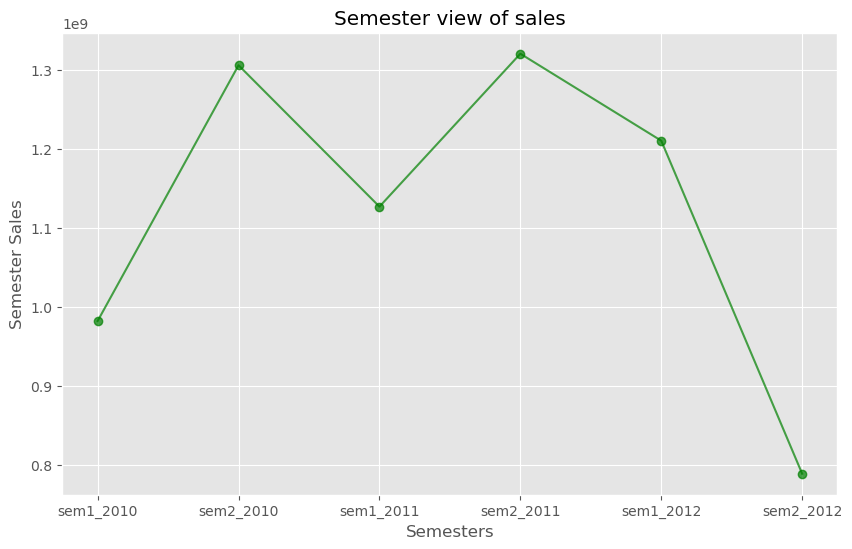

In [29]:
plt.figure(figsize=(10,6))
plt.plot(semester_names,semester_sales,marker='o',mfc='g',alpha=0.7,color='green')
plt.xlabel("Semesters")
plt.ylabel("Semester Sales")
plt.title("Semester view of sales")

Here, overall monthly sales are higher in the month of December while the semisterly sales in the sem2_2011 are the highest.
In the year 2010 monthly sales are higher in december and lowest in october.
In the year 2011 monthly sales are higher in december and lowest in january.
In the year 2012 monthly sales are higher in april and lowest in january.

# Statistical Model




# For Store 1 – Build  prediction models to forecast demand




# 1.Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order)

In [30]:
x_object=df[df['Store'] == 1][['Store','Date']]
x_object

,Store,Date
0,1,2010-02-05
1,1,2010-02-12
2,1,2010-02-19
3,1,2010-02-26
4,1,2010-03-05
...,...,...
138,1,2012-09-28
139,1,2012-10-05
140,1,2012-10-12
141,1,2012-10-19


In [31]:
date_obj = df[df['Store'] == 1][['Date']]
date_obj

,Date
0,2010-02-05
1,2010-02-12
2,2010-02-19
3,2010-02-26
4,2010-03-05
...,...
138,2012-09-28
139,2012-10-05
140,2012-10-12
141,2012-10-19


In [32]:
x_object.Date=date_obj.index
x_object

,Store,Date
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4
...,...,...
138,1,138
139,1,139
140,1,140
141,1,141


# Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

In [33]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month'],
      dtype='object')

In [34]:
X_feature=df.drop(["Weekly_Sales","Holiday_Flag","Date","Year","Month","Unemployment"],axis=1)
X_feature=X_feature[X_feature["Store"]==1]
Y_target=df[df['Store']==1]["Weekly_Sales"]
print (X_feature)
print (Y_target)

     Store  Temperature  Fuel_Price         CPI
0        1        42.31       2.572  211.096358
1        1        38.51       2.548  211.242170
2        1        39.93       2.514  211.289143
3        1        46.63       2.561  211.319643
4        1        46.50       2.625  211.350143
..     ...          ...         ...         ...
138      1        76.08       3.666  222.981658
139      1        68.55       3.617  223.181477
140      1        62.99       3.601  223.381296
141      1        67.97       3.594  223.425723
142      1        69.16       3.506  223.444251

[143 rows x 4 columns]
0      1643690.90
1      1641957.44
2      1611968.17
3      1409727.59
4      1554806.68
          ...    
138    1437059.26
139    1670785.97
140    1573072.81
141    1508068.77
142    1493659.74
Name: Weekly_Sales, Length: 143, dtype: float64


In [35]:
# Splitting the data into training & testing datasets
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_feature,Y_target,test_size=0.25,random_state=0 )

In [36]:
print (X_train.shape)
print (Y_train.shape)
print (X_test.shape)
print (Y_test.shape)

(107, 4)
(107,)
(36, 4)
(36,)


In [37]:
#import linear model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,Y_train,)

LinearRegression()

In [38]:
print(linreg.intercept_)
print(linreg.coef_)

-21211.43967985874
[    0.         -2205.21336452 -7800.78291088  8052.94206211]


In [39]:
X_feature.columns

Index(['Store', 'Temperature', 'Fuel_Price', 'CPI'], dtype='object')

<AxesSubplot:>

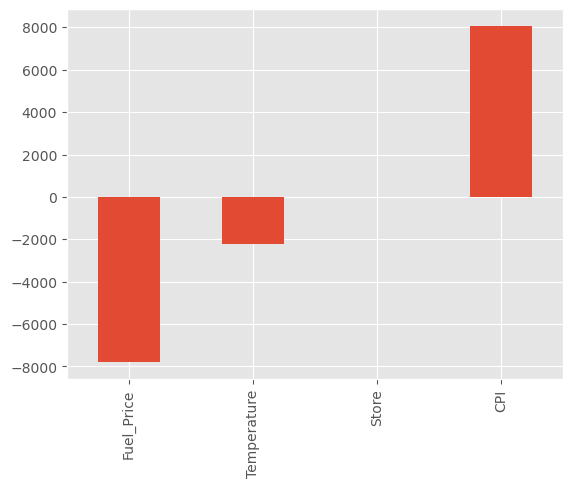

In [40]:
relation=pd.Series(linreg.coef_,X_feature.columns).sort_values()
relation.plot(kind="bar")

From the above plot, CPI has the huge positive impact towards weekly sales of Store 1 .
On the other hand, we can conclude that Fuel_Price has a great negative impact on weekly sales of store 1.

In [41]:
print(format(linreg.score(X_test,Y_test)))
print(sqrt(mean_squared_error(Y_train,linreg.predict(X_train))))
print(sqrt(mean_squared_error(Y_test,linreg.predict(X_test))))

0.10418395241957368
149008.62587628452
141607.41112065336


Here test error is less than train error. Hence our predicted model is well and good for Store 1. 
Since we are dealing with only Store 1  so we can't say about the whole walmart_data. Maybe this model predict more well or not when we work on whole data.

# 2.Change dates into days by creating new variable.

In [42]:
df['Day'] = pd.to_datetime(df['Date']).dt.day_name()
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,Friday
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,Friday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,Friday
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,Friday
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,Friday
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,Friday
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,Friday
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,Friday


In [43]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day'],
      dtype='object')

In [44]:
df['Days'] = pd.DatetimeIndex(df['Date']).day
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Days
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,Friday,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,Friday,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,Friday,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,Friday,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,Friday,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,Friday,28
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,Friday,5
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,Friday,12
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,Friday,19


# Selecting the model which gives best accuracy.

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression


In [46]:
# Select features and target 
X = df[['Store','Fuel_Price','CPI','Days','Unemployment','Month','Year']]
y = df['Weekly_Sales']

# Split data to train and test (0.80:0.20)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

Linear Regression:

Accuracy: 15.94269536607964
Mean Absolute Error: 451496.08808281797
Mean Squared Error: 302038421031.43774
Root Mean Squared Error: 549580.2225621276


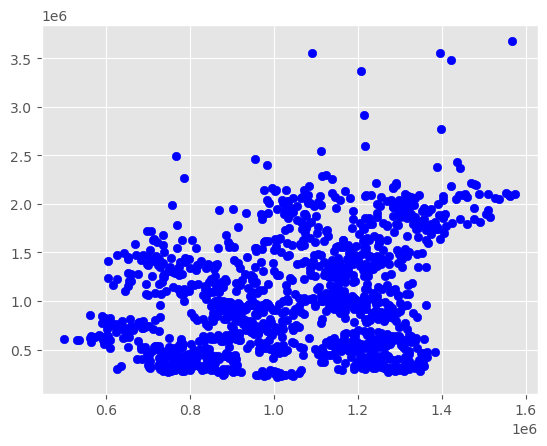

In [47]:
# Linear Regression model
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, y_train)*100)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
plt.scatter(y_pred, y_test,color='blue');

Random Forest Regressor:

Accuracy: 96.7206501147521
Mean Absolute Error: 57260.225345313964
Mean Squared Error: 10898843896.48952
Root Mean Squared Error: 104397.5282106311


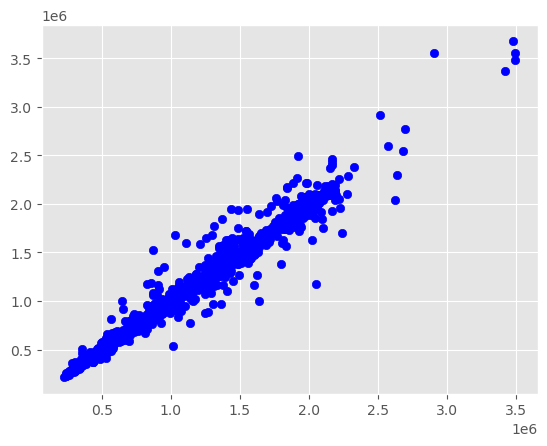

In [48]:
# Random Forest Regressor
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)        
rfr.fit(X_train, y_train)
y_pred=rfr.predict(X_test)
print('Accuracy:',rfr.score(X_test, y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
plt.scatter(y_pred, y_test,color='blue');


In [49]:
#KNeighbors Regressor
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor

KNeighborsRegressor
Accuracy: 63.97205389396707
Mean Absolute Error: 231838.27192074593
Mean Squared Error: 119738049998.01286
Root Mean Squared Error: 346031.86269188114


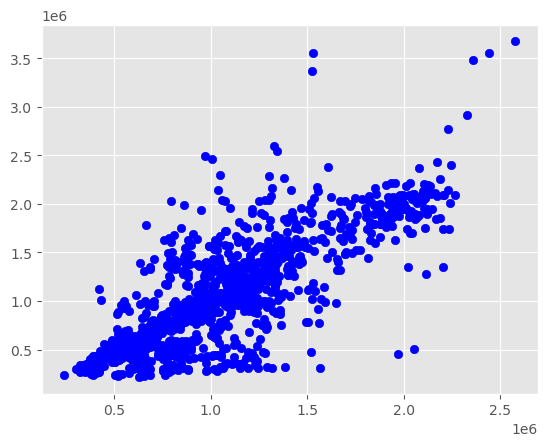

In [50]:
print('KNeighborsRegressor')
knn=KNeighborsRegressor() 
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy:',knn.score(X_test, y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
plt.scatter(y_pred, y_test,color='blue');

* Decision Tree Regressor *

Accuracy                 = 94.787 %
Mean Absolute Error      = 71315.02231
Mean Squared Error       = 17325701078.37562
Root Mean Squared Error  = 131627.12896


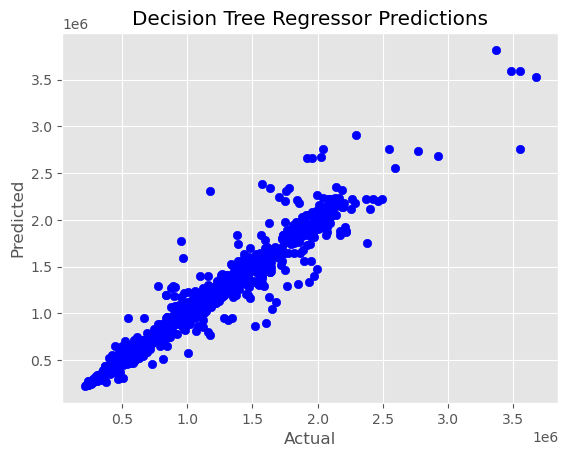

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

# Initialize and train the Decision Tree Regressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

# Make predictions
dtr_y_pred = dtr.predict(X_test)

# Calculate the R² score
R2_dtr = dtr.score(X_test, y_test)

# Calculate other performance metrics
mae = metrics.mean_absolute_error(y_test, dtr_y_pred)
mse = metrics.mean_squared_error(y_test, dtr_y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, dtr_y_pred))

# Print the results
print('* Decision Tree Regressor *\n')
print('Accuracy                 =', R2_dtr.round(5) * 100, '%')
print('Mean Absolute Error      =', mae.round(5))
print('Mean Squared Error       =', mse.round(5))
print('Root Mean Squared Error  =', rmse.round(5))

# Plot the results
plt.scatter(y_test, dtr_y_pred, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Regressor Predictions')
plt.show()




# Selecting the model

Best accuracy model we found

Random Forest Regressor with 96% accuracy of the model

       __________________________________________________________________________________________________________________
                                       
                                               Submitted By:R.Rakesh
                            ####################### Thank-You ########################